---
# Basics in Python - 2
---

## Pandas

In [ ]:
import pandas as pd

pd.__version__

'2.2.2'

## Pandas Series

In [ ]:
pd.Series([0.25, 0.5]) # list data

,0
0,0.25
1,0.50


In [ ]:
pd.Series({"a": 0.25, "b": 0.5}) # dict data

,0
a,0.25
b,0.50


In [ ]:
# explicit index definition for list
data = pd.Series([0.25, 0.5], index=["a", "b"])
data

,0
a,0.25
b,0.50


In [ ]:
print(data["b"]) # explicit access

0.5


In [ ]:
data["c"] = 0.75
print(data)

a    0.25
b    0.50
c    0.75
dtype: float64


## Pandas DataFrames

In [ ]:
population_dict = {"California": 38332521, "Texas": 26448193, "New York": 19651127, "Florida": 19552860}
population = pd.Series(population_dict)
population

,0
California,38332521
Texas,26448193
New York,19651127
Florida,19552860


In [ ]:
area = pd.Series({"California": 423967, "Texas": 695662, "New York": 141297, "Florida": 170312})
area

,0
California,423967
Texas,695662
New York,141297
Florida,170312


In [ ]:
states = pd.DataFrame({"population": population, "area": area})
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312


In [ ]:
states.index

Index(['California', 'Texas', 'New York', 'Florida'], dtype='object')

In [ ]:
states.columns

Index(['population', 'area'], dtype='object')

In [ ]:
states["population"]

,population
California,38332521
Texas,26448193
New York,19651127
Florida,19552860


### Creating a DataFrame from a NumPy Array

In [ ]:
import numpy as np
pd.DataFrame(np.random.rand(3, 2), columns=["foo", "bar"], index=["a", "b", "c"])

,foo,bar
a,0.410759,0.713246
b,0.003453,0.618933
c,0.160157,0.417956


In [ ]:
pd.DataFrame(np.random.rand(3, 2))

### Accessing Elements

In [ ]:
data = pd.Series([0.25, 0.5, 0.75, 1.0], index=["a", "b", "c", "d"])
data

,0
a,0.25
b,0.50
c,0.75
d,1.00


In [ ]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

In [ ]:
data[1]

<ipython-input-20-c402bf503b75>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data[1]


np.float64(0.5)

In [ ]:
data[1:3]

,0
b,0.50
c,0.75


In [ ]:
print(data.loc["b"])

0.5


In [ ]:
print(data.loc["b":"c"])

b    0.50
c    0.75
dtype: float64


In [ ]:
print(data.iloc[1])

0.5


In [ ]:
print(data.iloc[1:3])

b    0.50
c    0.75
dtype: float64


### Combining Datasets

In [ ]:
orders = pd.DataFrame({
  "Order ID": [1001, 1002, 1003],
  "Product": ["Widget A", "Widget B", "Widget C"],
  "Quantity": [5, 2, 3]
  })
orders

,Order ID,Product,Quantity
0,1001,Widget A,5
1,1002,Widget B,2
2,1003,Widget C,3


In [ ]:
shipping = pd.DataFrame({
    "Shipping Date": ["2025-06-01", "2025-06-02", "2025-06-03"],
})
shipping

,Shipping Date
0,2025-06-01
1,2025-06-02
2,2025-06-03


In [ ]:
# Concatenate orders with shipping details side-by-side
pd.concat([orders, shipping], axis=1)

,Order ID,Product,Quantity,Shipping Date
0,1001,Widget A,5,2025-06-01
1,1002,Widget B,2,2025-06-02
2,1003,Widget C,3,2025-06-03


In [ ]:
orders2 = pd.DataFrame({
    "Order ID": [1004, 1005],
    "Product": ["Widget D", "Widget E"],
    "Quantity": [4, 9]
})

In [ ]:
# Concatenate further orders row-wise
pd.concat([orders, orders2])

,Order ID,Product,Quantity
0,1001,Widget A,5
1,1002,Widget B,2
2,1003,Widget C,3
0,1004,Widget D,4
1,1005,Widget E,9


### Merging Datasets

In [ ]:
bands = pd.DataFrame({
    "Band ID": [101, 102, 103, 104],
    "Band Name": ["The Beatles", "The Rolling Stones", "The Who", "The Doors"]
})
bands

,Band ID,Band Name
0,101,The Beatles
1,102,The Rolling Stones
2,103,The Who
3,104,The Doors


In [ ]:
songs = pd.DataFrame({
    "ID": [101, 102],
    "Song Title": ["Come Together", "Paint It Black"]
})
songs

,ID,Song Title
0,101,Come Together
1,102,Paint It Black


In [ ]:
# Left join
pd.merge(bands, songs, left_on="Band ID", right_on="ID", how="left")

,Band ID,Band Name,ID,Song Title
0,101,The Beatles,101.0,Come Together
1,102,The Rolling Stones,102.0,Paint It Black
2,103,The Who,NaN,NaN
3,104,The Doors,NaN,NaN


# Data Cleaning

In [ ]:
import seaborn as sns

iris = sns.load_dataset("iris")

In [ ]:
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [ ]:
iris.iloc[0:3, 1]

,sepal_width
0,3.5
1,3.0
2,3.2


In [ ]:
iris["sepal_width"][0:3]

,sepal_width
0,3.5
1,3.0
2,3.2


In [ ]:
iris["sepal_width"].head(3)

,sepal_width
0,3.5
1,3.0
2,3.2


In [ ]:
iris.loc[iris["sepal_width"] <= 3.5]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
6,4.6,3.4,1.4,0.3,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
iris.loc[iris["sepal_width"] <= 3.5, ["petal_width", "species"]]

,petal_width,species
0,0.2,setosa
1,0.2,setosa
2,0.2,setosa
3,0.2,setosa
6,0.3,setosa
...,...,...
145,2.3,virginica
146,1.9,virginica
147,2.0,virginica
148,2.3,virginica


In [ ]:
iris["log_SepLen"] = np.log(iris["sepal_length"])
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species,log_SepLen
0,5.1,3.5,1.4,0.2,setosa,1.629241
1,4.9,3.0,1.4,0.2,setosa,1.589235
2,4.7,3.2,1.3,0.2,setosa,1.547563
3,4.6,3.1,1.5,0.2,setosa,1.526056
4,5.0,3.6,1.4,0.2,setosa,1.609438


In [ ]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species,log_SepLen
0,5.1,3.5,1.4,0.2,setosa,1.629241
1,4.9,3.0,1.4,0.2,setosa,1.589235
2,4.7,3.2,1.3,0.2,setosa,1.547563
3,4.6,3.1,1.5,0.2,setosa,1.526056
4,5.0,3.6,1.4,0.2,setosa,1.609438
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1.902108
146,6.3,2.5,5.0,1.9,virginica,1.840550
147,6.5,3.0,5.2,2.0,virginica,1.871802
148,6.2,3.4,5.4,2.3,virginica,1.824549


In [ ]:
iris = iris.assign(log_SepLen = np.log(iris["sepal_length"]))
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species,log_SepLen
0,5.1,3.5,1.4,0.2,setosa,1.629241
1,4.9,3.0,1.4,0.2,setosa,1.589235
2,4.7,3.2,1.3,0.2,setosa,1.547563
3,4.6,3.1,1.5,0.2,setosa,1.526056
4,5.0,3.6,1.4,0.2,setosa,1.609438


### Data Aggregation

In [ ]:
iris["sepal_length"].count()

np.int64(150)

In [ ]:
iris["sepal_width"].mean()

np.float64(3.0573333333333337)

In [ ]:
iris["petal_length"].max()

6.9

In [ ]:
iris["petal_width"].std()

0.7622376689603465

In [ ]:
iris["log_SepLen"].sum()

np.float64(263.30893202884204)

In [ ]:
print("The mean of", iris["sepal_length"].count(),  "observations is ", iris["sepal_length"].mean())

The mean of 150 observations is  5.843333333333334


### Conditional Aggregation

In [ ]:
iris.groupby("species").mean()

,sepal_length,sepal_width,petal_length,petal_width,log_SepLen
species,,,,,
setosa,5.006,3.428,1.462,0.246,1.608205
versicolor,5.936,2.770,4.260,1.326,1.777319
virginica,6.588,2.974,5.552,2.026,1.880654


In [ ]:
iris.groupby("species").agg({"sepal_width": ["min", "mean", "max"]})

sepal_width            
                   min   mean  max
species                           
setosa             2.3  3.428  4.4
versicolor         2.0  2.770  3.4
virginica          2.2  2.974  3.8

In [ ]:
iris.groupby("species").agg(["min", "median", "max"])

sepal_length             sepal_width             petal_length  \
                    min median  max         min median  max          min   
species                                                                    
setosa              4.3    5.0  5.8         2.3    3.4  4.4          1.0   
versicolor          4.9    5.9  7.0         2.0    2.8  3.4          3.0   
virginica           4.9    6.5  7.9         2.2    3.0  3.8          4.5   

                       petal_width             log_SepLen                      
           median  max         min median  max        min    median       max  
species                                                                        
setosa       1.50  1.9         0.1    0.2  0.6   1.458615  1.609438  1.757858  
versicolor   4.35  5.1         1.0    1.3  1.8   1.589235  1.774952  1.945910  
virginica    5.55  6.9         1.4    2.0  2.5   1.589235  1.871802  2.066863

### Missing Values

In [ ]:
import seaborn as sns
titanic = sns.load_dataset("titanic")
titanic.shape

(891, 15)

In [ ]:
titanic.isna().sum() # Count missing values per column

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [ ]:
titanic["age"].isna().sum() # Count missing in one column

np.int64(177)

In [ ]:
titanic[titanic["age"].isna()] # Filter rows where age is missing

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False
868,0,3,male,NaN,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
titanic_clean = titanic.dropna(subset=["age"]) # Drop rows with missing age
titanic_clean.shape

(714, 15)

In [ ]:
titanic_clean = titanic.dropna() # Drop any rows with missing values
titanic_clean.shape

(182, 15)

In [ ]:
age_clean = titanic["age"].fillna(titanic["age"].mean()) # Fill with mean age
age_clean.isna().sum() # Count missing in one column

np.int64(0)

In [ ]:
embark_town_clean = titanic["embark_town"].fillna("Unknown") # Fill with category

In [ ]:
titanic_clean = titanic.ffill() # Forward fill
titanic_clean.isna().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [ ]:
titanic_clean[titanic_clean["deck"].isna()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False


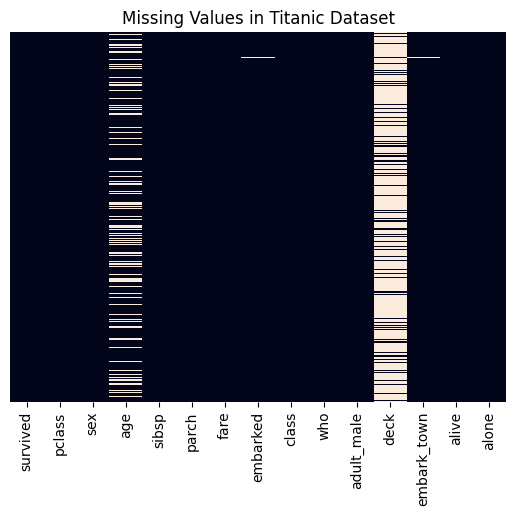

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(titanic.isna(),
cbar=False, yticklabels=False)
plt.title("Missing Values in Titanic Dataset")
plt.show()